<IPython.core.display.Javascript object>


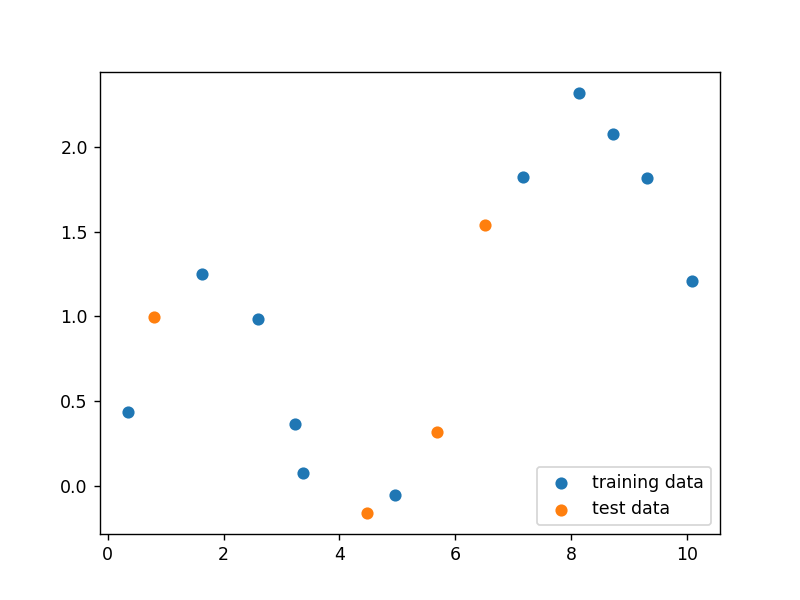

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
#     import matplotlib.pyplot as plt
#     %matplotlib notebook
#     plt.figure()
#     plt.scatter(X_train, y_train, label='training data')
#     plt.scatter(X_test, y_test, label='test data')
#     plt.legend(loc=4);
    return 
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
# part1_scatter()

In [16]:
def answer_one():
#     from sklearn.linear_model import LinearRegression
#     from sklearn.preprocessing import PolynomialFeatures
    
    ans=np.zeros((4,100))
    
    for i,deg in enumerate([1,3,6,9]):
        p=PolynomialFeatures(degree=deg)
        l=LinearRegression().fit(p.fit_transform(X_train.reshape(-1,1)),y_train)
        a=l.predict(p.fit_transform(np.linspace(0,10,100).reshape(100,1)))
        ans[i,:]=a
    
    return ans# Return your answer

In [17]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
#     import matplotlib.pyplot as plt
#     %matplotlib notebook
#     plt.figure(figsize=(10,5))
#     plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
#     plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
#     for i,degree in enumerate([1,3,6,9]):
#         plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
#     plt.ylim(-1,2.5)
#     plt.legend(loc=4)

# plot_one(answer_one())

In [67]:
def answer_two():
#     from sklearn.linear_model import LinearRegression
#     from sklearn.preprocessing import PolynomialFeatures
#     from sklearn.metrics import r2_score
    
    test=[]
    train=[]

    for i in [0,1,2,3,4,5,6,7,8,9]:
        p=PolynomialFeatures(degree=i)
        l=LinearRegression().fit(p.fit_transform(X_train.reshape(-1,1)),y_train)
        reg_score1=r2_score(y_train,l.predict(p.fit_transform(X_train.reshape(-1,1))))
        reg_score2=r2_score(y_test,l.predict(p.fit_transform(X_test.reshape(-1,1))))
        train.append(reg_score1)
        test.append(reg_score2)
        

    return (np.array(train).reshape(10,1),np.array(test).reshape(10,1))# Your answer here

# answer_two()

NameError: name 'X_train' is not defined

In [ ]:
def answer_three():
    
    # Your code here
    t=tuple(0,9,7)
    return t     # Return your answer

In [22]:
def answer_four():
#     from sklearn.preprocessing import PolynomialFeatures
#     from sklearn.linear_model import Lasso, LinearRegression
#     from sklearn.metrics import r2_score
    
    p=PolynomialFeatures(degree=12)
    linear=LinearRegression().fit(p.fit_transform(X_train.reshape(-1,1)),y_train)
    lasso=Lasso(alpha=0.01,max_iter=10000).fit(p.fit_transform(X_train.reshape(-1,1)),y_train)

    return (linear.score(p.fit_transform(X_test.reshape(-1,1)),y_test),lasso.score(p.fit_transform(X_test.reshape(-1,1)),y_test))# Your answer here

# answer_four()

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35564216958893824, tolerance: 0.00068949825403828
  model = cd_fast.enet_coordinate_descent(


(-4.311981228294102, 0.8406625614750372)

In [60]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('readonly/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

In [62]:
def answer_five():
#     from sklearn.tree import DecisionTreeClassifier
    
    d=DecisionTreeClassifier(random_state=0).fit(X_train2,y_train2)
#     print(X_train2.columns)
    a=d.feature_importances_
    important=[]
    for i,imp in enumerate (a):
        important.append([imp,i])
    important.sort(reverse=True)
#     print(X_train2.columns[important[0][1]])
    
    ans=[]
    for i in range(5):
        ans.append(X_train2.columns[important[i][1]])

    return ans
# answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [43]:
def answer_six():
#     from sklearn.svm import SVC
#     from sklearn.model_selection import validation_curve

    train,test=validation_curve(SVC(kernel='rbf',C=1,random_state=0),X_subset,y_subset,param_name='gamma',param_range=np.logspace(-4,1,6),cv=3,scoring='accuracy')

    meantrain=[]
    meantest=[]
    
    for i in train:
        meantrain.append(np.mean(i))
    
    for i in test:
        meantest.append(np.mean(i))
        
    return tuple([np.array(meantrain).reshape(6,),np.array(meantest).reshape(6,)])  # Your answer here

# answer_six()

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

In [58]:
def answer_seven():
    
#     import matplotlib.pyplot as plt
    
#     meantrain,meantest=answer_six()
#     plt.plot(np.logspace(-4,1,6),meantrain,label="train",color='b')
#     plt.plot(np.logspace(-4,1,6),meantest,label="test",color='g')
#     plt.title("finding gamma value")
    
    return tuple([0.0001,10,0.1])# Return your answer

# answer_seven()

(0.0001, 10, 0.1)